In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data_cyrdel = np.load("/Users/sakaikeiichirou/CellTK/output/20201209-cyr1del_large_roi/df.npz",allow_pickle=True)
data_wt = np.load("/Users/sakaikeiichirou/CellTK/output/20201209-PKAKTR-nd4-RFP/df.npz",allow_pickle=True)

print(data_cyrdel.files)
print(data_wt.files)

print(data_cyrdel['arr'].shape)
print(data_cyrdel['labels'].shape)
print(data_cyrdel['time'].shape)

print(data_wt['arr'].shape)
print(data_wt['labels'].shape)
print(data_wt['time'].shape)

arr_cyrdel = data_cyrdel['arr']
labels_cyrdel = data_cyrdel['labels']
time_cyrdel = data_cyrdel['time']

arr_wt = data_wt['arr']
labels_wt = data_wt['labels']
time_wt = data_wt['time']

['arr', 'labels', 'time']
['arr', 'labels', 'time']
(40, 1, 121)
(40, 3)
(121,)
(40, 220, 121)
(40, 3)
(121,)


In [28]:
timepoint = range(10) # 0-277の278個, timepoint 3つめの要素 arr[label,cell,timepoint]
cell_cyrdel = range(1)# 0-10 細胞
label1_cyrdel = np.all((labels_cyrdel == 'cyto') | (labels_cyrdel == 'RFP') | (labels_cyrdel == 'median_intensity'), axis=1)
label2_cyrdel = np.all((labels_cyrdel == 'nuc') | (labels_cyrdel == 'RFP') | (labels_cyrdel == 'median_intensity'), axis=1)

label2_cyrdel


#plt.figure(facecolor='w')
#plt.plot(time_cyrdel, arr_cyrdel[label1_cyrdel,cell_cyrdel,:][i,:]/arr[label2_cyrdel,cell_cyrdel,:][i,:])

##plt.savefig('miura_track.png',bbox_inches='tight', dpi=300)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [13]:
timepoint = range(10) # 0-277の278個, timepoint 3つめの要素 arr[label,cell,timepoint]
cell_wt = range(201)# 0-10 細胞
label1_wt = np.all((labels_wt == 'cyto') | (labels_wt == 'RFP') | (labels_wt == 'median_intensity'), axis=1)
label2_wt = np.all((labels_wt == 'nuc') | (labels_wt == 'RFP') | (labels_wt == 'median_intensity'), axis=1)

plt.figure(facecolor='w')
for i in cell_wt:
    plt.plot(time, arr_wt[label2_wt,cell_wt,:][i,:])

plt.figure(facecolor='w')
for i in cell_wt:
    plt.plot(time, arr_wt[label1_wt,cell_wt,:][i,:]/arr_wt[label2_wt,cell_wt,:][i,:])

##plt.savefig('miura_track.png',bbox_inches='tight', dpi=300)

NameError: name 'time' is not defined

<Figure size 432x288 with 0 Axes>

In [14]:
df = pd.DataFrame()
for i in cell_wt:
    tmp_nuc = arr_wt[label2_wt,cell_wt,:][i,:]
    tmp_cyto = arr_wt[label1_wt,cell_wt,:][i,:]
    tmp = pd.DataFrame([tmp_nuc,tmp_cyto],index=["nuc","cyto"]).T
    tmp["c/n"] = tmp_cyto/tmp_nuc
    tmp["cell_id"] = np.full(121,i)
    tmp["time"] = np.arange(121)
    df = pd.concat([df,tmp])
display(df)
    

nuc   cyto       c/n  cell_id  time
0    345.0  341.5  0.989855        0     0
1    349.5  332.0  0.949928        0     1
2    353.0  340.5  0.964589        0     2
3    346.0  333.0  0.962428        0     3
4    345.5  331.0  0.958032        0     4
..     ...    ...       ...      ...   ...
116  263.5  281.0  1.066414      200   116
117  270.0  281.0  1.040741      200   117
118  271.0  277.0  1.022140      200   118
119  274.0  283.0  1.032847      200   119
120  280.0  286.0  1.021429      200   120

[24321 rows x 5 columns]

In [16]:
df_cyrdel = pd.DataFrame()
for i in cell_cyrdel:
    tmp_nuc_cyrdel = arr_cyrdel[label2_cyrdel,cell_cyrdel,:][i,:]
    tmp_cyto_cyrdel = arr_cyrdel[label1_cyrdel,cell_cyrdel,:][i,:]
    tmp_cyrdel = pd.DataFrame([tmp_nuc_cyrdel,tmp_cyto_cyrdel],index=["nuc_cyrdel","cyto_cyrdel"]).T
    tmp_cyrdel["c/n_cyrdel"] = tmp_cyto_cyrdel/tmp_nuc_cyrdel
    tmp_cyrdel["cell_id_cyrdel"] = np.full(121,i)
    tmp_cyrdel["time_cyrdel"] = np.arange(121)
    df_cyrdel = pd.concat([df_cyrdel,tmp_cyrdel])
display(df_cyrdel)
    

nuc_cyrdel  cyto_cyrdel  c/n_cyrdel  cell_id_cyrdel  time_cyrdel
0    1378.969116          NaN         NaN               0            0
1    1368.448486          NaN         NaN               0            1
2    1400.550293          NaN         NaN               0            2
3    1364.493408          NaN         NaN               0            3
4    1344.273438          NaN         NaN               0            4
..           ...          ...         ...             ...          ...
116   688.451782          NaN         NaN               0          116
117   686.319580          NaN         NaN               0          117
118   675.474121          NaN         NaN               0          118
119   714.560913          NaN         NaN               0          119
120   723.982666          NaN         NaN               0          120

[121 rows x 5 columns]

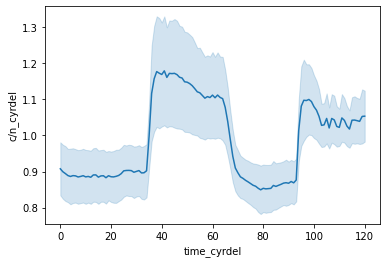

In [17]:
sns.lineplot(data=df, x="time", y="c/n", ci="sd")
sns.lineplot(data=df_cyrdel, x="time_cyrdel", y="c/n_cyrdel", ci="sd")

In [65]:
gr = df.groupby('cell_id').mean()
plt.hist(gr["nuc"])

(array([37., 88.,  7.,  2.,  3.,  9., 17., 21., 10.,  7.]),
 array([ 187.2       ,  293.53888889,  399.87777778,  506.21666667,
         612.55555556,  718.89444444,  825.23333333,  931.57222222,
        1037.91111111, 1144.25      , 1250.58888889]),
 <a list of 10 Patch objects>)

In [66]:
gr_high = gr[gr["nuc"]>600]
gr_low = gr[gr["nuc"]<600]
display(gr_high)
display(gr_low)
gr_high.index

nuc         cyto       c/n  time
cell_id                                          
19        986.194215   818.500000  0.881312    60
27       1055.719008  1015.500000  1.020729    60
29        960.661157   853.640496  0.954087    60
35       1038.975207   948.921488  0.990361    60
37        773.140496   775.871901  1.046799    60
...              ...          ...       ...   ...
166       880.954545   799.673554  0.965087    60
177       638.645833   513.729167  0.804579    60
186       670.156250   706.500000  1.054708    60
187       726.750000   785.100000  1.080633    60
192       716.107143   726.071429  1.014306    60

[67 rows x 4 columns]

nuc        cyto       c/n  time
cell_id                                        
0        283.479339  276.665289  0.979182    60
1        288.525424  297.351695  1.036178    60
2        340.713043  312.486957  0.933179    60
3        292.685950  268.809917  0.930223    60
4        280.385714  269.028571  0.962388    60
...             ...         ...       ...   ...
196      352.550000  354.300000  1.005067    60
197      268.833333  286.583333  1.066174    60
198      324.416667  334.000000  1.029556    60
199      265.333333  275.333333  1.037739    60
200      270.416667  280.833333  1.038802    60

[134 rows x 4 columns]

Int64Index([ 19,  27,  29,  35,  37,  38,  41,  44,  48,  53,  55,  59,  60,
             61,  62,  63,  67,  68,  70,  72,  90,  92,  95,  96,  97,  98,
            101, 102, 103, 104, 107, 108, 109, 111, 112, 113, 114, 115, 118,
            120, 121, 123, 124, 125, 126, 128, 133, 134, 135, 136, 137, 138,
            140, 144, 146, 148, 149, 154, 159, 160, 161, 165, 166, 177, 186,
            187, 192],
           dtype='int64', name='cell_id')

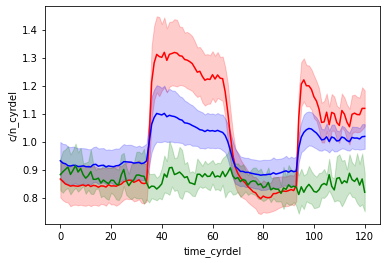

In [67]:
sns.lineplot(data=df[df["cell_id"].isin(gr_high.index.values)], x="time", y="c/n", ci="sd", color="red")
sns.lineplot(data=df[df["cell_id"].isin(gr_low.index.values)], x="time", y="c/n", ci="sd", color="blue")
sns.lineplot(data=df_cyrdel, x="time_cyrdel", y="c/n_cyrdel", ci="sd", color="green")

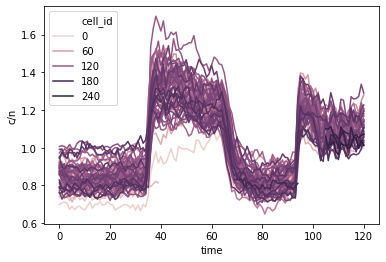

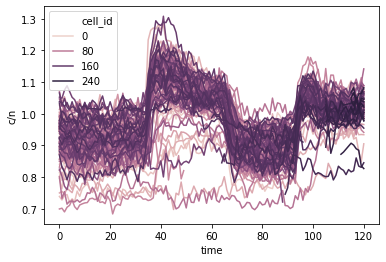

In [68]:
sns.lineplot(data=df[df["cell_id"].isin(gr_high.index.values)], hue="cell_id", x="time", y="c/n")
plt.show()
sns.lineplot(data=df[df["cell_id"].isin(gr_low.index.values)], hue="cell_id", x="time", y="c/n")

In [69]:
high = df[df["cell_id"].isin(gr_high.index.values)]
heat = pd.DataFrame(high["c/n"].values.reshape(int(len(high)/121),121))
heat_sort = heat
heat_sort["sum"] = heat.sum(axis=1)
heat_sort = heat_sort.sort_values("sum",ascending=False)
sns.heatmap(heat_sort.iloc[:,:-1],vmax=1.6,vmin=0.7)

In [70]:
low = df[df["cell_id"].isin(gr_low.index.values)]
heat_low = pd.DataFrame(low["c/n"].values.reshape(int(len(low)/121),121))
heat_low_sort = heat_low
heat_low_sort["sum"] = heat_low.sum(axis=1)
heat_low_sort = heat_low_sort.sort_values("sum",ascending=False)
sns.heatmap(heat_low_sort.iloc[:,:-1],vmax=1.6,vmin=0.7)

In [71]:
heat_cyrdel = pd.DataFrame(df_cyrdel["c/n_cyrdel"].values.reshape(int(len(df_cyrdel)/121),121))
sns.heatmap(heat_cyrdel.iloc[:,:-1],vmax=1.6,vmin=0.7)